<a href="https://colab.research.google.com/github/RICKY-UPB/Leanbackhimaupb/blob/master/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasifikasi Obesitas menggunakan KNN  
Dibuat oleh : RIKI SUPRIYATNA
NIM         : 312110025
UNIVERSITAS PELITA BANGSA


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
fdata="https://raw.githubusercontent.com/RICKY-UPB/UAS-AI/refs/heads/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [93]:
#ringkasan informasi tentang DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int64  
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.0 KB


In [7]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")


Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [8]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [103]:
from sklearn.model_selection import train_test_split
y=df.Label
X=df.drop("Label", axis=1)

In [104]:
from sklearn.model_selection import train_test_split
y=df.Gender
X=df.drop("Gender", axis=1)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [107]:
scl=StandardScaler()
x_train_scl=scl.fit_transform(x_train)
x_test_scl=scl.transform(x_test)

lbl_encoder=LabelEncoder()
y_train_enc=lbl_encoder.fit_transform(y_train)
y_test_enc=lbl_encoder.transform(y_test)

In [108]:
x_train

,ID,Age,Height,Weight,BMI,Label
12,13,28,180,80,25.3,0
68,71,15,175,45,18.7,3
1,2,30,160,60,22.5,0
15,16,43,140,50,20.0,3
38,41,17,175,65,22.7,0
...,...,...,...,...,...,...
3,4,40,150,50,20.0,3
2,3,35,180,90,27.3,2
6,7,55,200,110,34.2,1
27,29,103,130,30,13.3,3


In [109]:
x_train_scl

array([[-1.42231094e+00, -7.10968208e-01,  4.75233157e-01,
         7.23913415e-01,  6.24384497e-01, -1.40885760e+00],
       [ 4.22809207e-01, -1.22510951e+00,  2.88611917e-01,
        -5.39263037e-01, -2.65845698e-01,  9.82492797e-01],
       [-1.77224751e+00, -6.31869546e-01, -2.71251802e-01,
         2.09829975e-03,  2.46711081e-01, -1.40885760e+00],
       [-1.32687369e+00, -1.17728241e-01, -1.01773676e+00,
        -3.58809258e-01, -9.04973260e-02,  9.82492797e-01],
       [-5.31563281e-01, -1.14601085e+00,  2.88611917e-01,
         1.82552079e-01,  2.73687754e-01, -1.40885760e+00],
       [-1.00874952e+00,  1.66199166e+00,  8.48475637e-01,
         1.44572853e+00,  1.42019634e+00, -6.11740798e-01],
       [ 1.40899411e+00, -1.57277572e-01,  1.22171812e+00,
        -1.08062437e+00, -9.94215857e-01,  9.82492797e-01],
       [ 4.86434039e-01, -8.29616201e-01,  4.75233157e-01,
        -1.78355479e-01,  7.13627094e-02, -1.40885760e+00],
       [-1.04056194e+00,  1.46424500e+00, -6.444

In [110]:
y_train

,Gender
12,1
68,1
1,0
15,0
38,1
...,...
3,0
2,1
6,1
27,0


In [111]:
y_train_enc

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [115]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.95


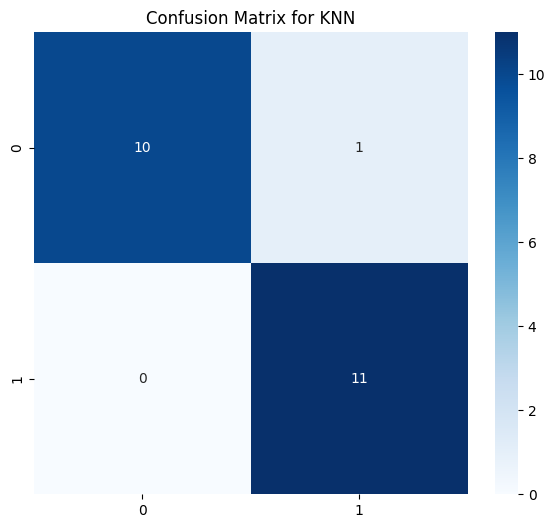

In [116]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.94444444 0.88235294 1.         1.         1.        ]
Rata score dengan 5 fold : 0.9653594771241829


In [119]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

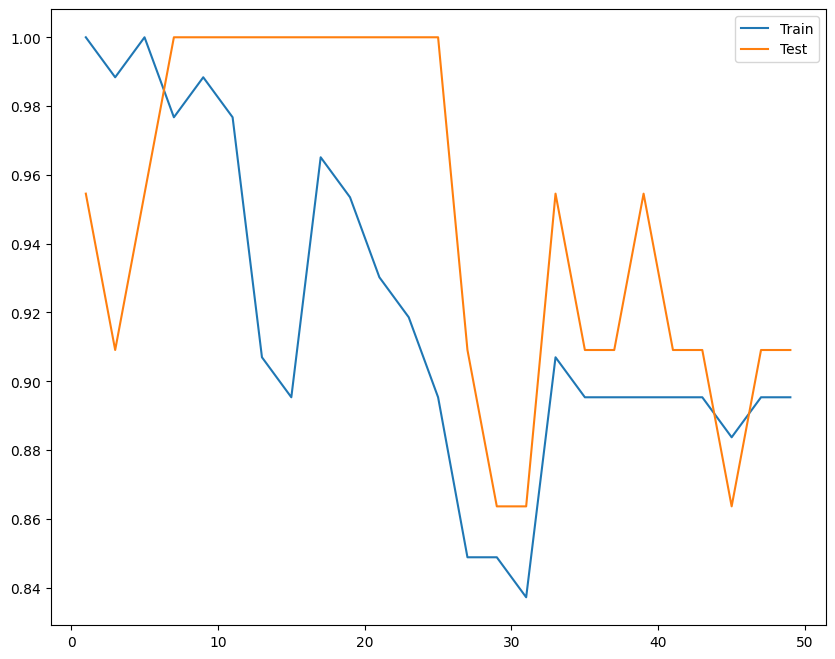

In [120]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [121]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 1.0
K Neighboard terbaik adalah 7
